In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Height Weight.csv')

In [3]:
df.head()

,Height,Weight
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height')

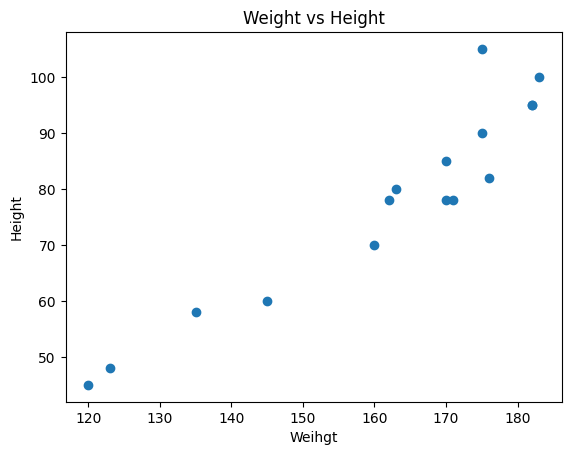

In [5]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weihgt")
plt.ylabel("Height")
plt.title("Weight vs Height")

In [6]:
#corelation
df.corr()

,Height,Weight
Height,1.000000,0.944632
Weight,0.944632,1.000000


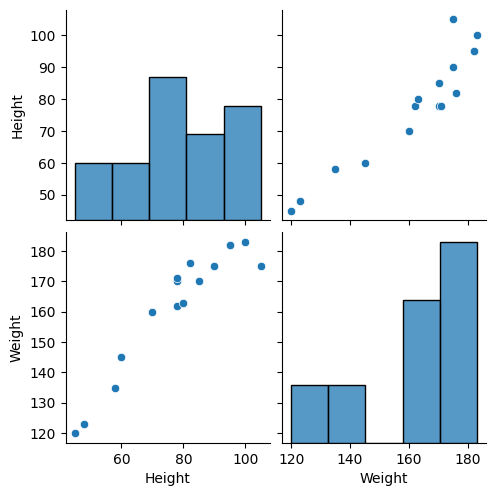

In [8]:
#seaborn for visual
import seaborn as sns
sns.pairplot(df)


In [11]:
#independent and dependent feaatures
X=df[['Weight']]#independent feature should be a dataframe or 2 dimensional array  , if you want to check it you can use X.head()
Y=df['Height']#this variable can be in series form or 1D array

In [14]:
np.array(X).shape#to check X is 2 D array

(16, 1)

In [15]:
np.array(Y).shape#to check Y is 1 D array

(16,)

In [16]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [18]:
X_train.shape#16 total - 12 train = 4 test


(12, 1)

In [20]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [21]:
X_test=scaler.transform(X_test)

In [22]:
X_test

array([[-2.78697338],
       [-1.89908805],
       [-0.30089447],
       [ 0.17264437]])

In [23]:
#apply linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)


LinearRegression()

In [24]:
regression

LinearRegression()

In [26]:
regression.coef_

array([14.65134102])

In [27]:
regression.intercept_

np.float64(81.75000000000001)

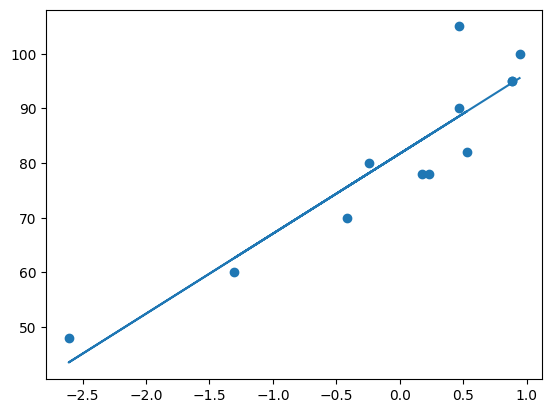

In [28]:
#plot tarining data for best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [29]:
#prediction fo test data
Y_pred=regression.predict(X_test)

In [31]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [32]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8.5554604963547
2.3840300250614312
2.92497187958358


In [33]:
from sklearn.metrics import r2_score

In [35]:
score=r2_score(Y_test,Y_pred)
print(score)

0.9660834073484452


In [36]:
#display adjusted r squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.9491251110226678

In [38]:
#OLS Linear Regression
import statsmodels.api as sm

In [40]:
model=sm.OLS(Y_train,X_train).fit()

In [41]:
prediction=model.predict(X_test)
print(prediction)

[-40.83289739 -27.82418672  -4.40850751   2.52947152]


In [42]:
print (model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):             -0.057
Method:                 Least Squares   F-statistic:                             0.3511
Date:                Fri, 08 Aug 2025   Prob (F-statistic):                       0.565
Time:                        02:43:00   Log-Likelihood:                         -69.908
No. Observations:                  12   AIC:                                      141.8
Df Residuals:                      11   BIC:                                      142.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
#prediction for new data
regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.71077155])

Reaon for negaative negative weight_---> poor model fit
 Missing intercept
 Not enough data
 Scaling issue